In [11]:
# Import Libraries
import numpy as np
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
spotify_df = pd.read_csv('../data/raw/spotify_songs.csv')

In [13]:
spotify_df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [14]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [15]:
numeric_data = spotify_df.select_dtypes(include='number')
numeric_data

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,20,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,14,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,15,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [16]:
categorical_data = spotify_df.select_dtypes(include='object')
categorical_data

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop
...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house


In [17]:
#counting unique values for all categorical data columns
unique_categorical_counts = categorical_data.nunique()
unique_categorical_counts

track_id                    28356
track_name                  23449
track_artist                10692
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
dtype: int64

- my immediate observation is that there are not as many track id as I expect, i expected that there would be 32,832 track id. 
- I need to figure out why there aren't as many, probably duplicates or empty cells.

In [18]:
#counting unique values for all numerical data columns
unique_numeric_counts = numeric_data.nunique()
unique_numeric_counts

track_popularity      101
danceability          822
energy                952
key                    12
loudness            10222
mode                    2
speechiness          1270
acousticness         3731
instrumentalness     4729
liveness             1624
valence              1362
tempo               17684
duration_ms         19785
dtype: int64

In [19]:
# Filtering the trackid column to identify 
trackid_counts = spotify_df['track_id'].value_counts()
filtered_counts = trackid_counts[trackid_counts>1]
filtered_counts

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
2Fxmhks0bxGSBdJ92vM42m     8
2tnVG71enUj33Ic2nFN6kZ     8
                          ..
3KYiA4vq6RPO1dE2XROXd8     2
2sZtaJ4RFbRAAOBKWEeR4H     2
2JiVVU7qv1YeD1yabpIyoX     2
1WkMMavIMc4JZ8cfMmxHkI     2
6hmhG1b4LEyNuashVvuIAo     2
Name: count, Length: 3166, dtype: int64

In [20]:
dup_df = spotify_df[spotify_df['track_id'].isin(filtered_counts.index)]
dup_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.613,124.008,176616
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.079900,0.000000,0.1430,0.585,124.982,163049
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4,-2.419,0,0.0434,0.033500,0.000005,0.1110,0.367,127.936,207619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32783,1mzGywacjpeik00PVLBPpF,All of Me (Tiësto's Birthday Treatment Remix) ...,John Legend,64,4c2rSdHI9WUXn0zyXoWtbB,All of Me (Tiësto's Birthday Treatment Remix) ...,2014-02-25,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-6.253,0,0.0283,0.000151,0.001650,0.0745,0.179,127.986,251613
32793,1nas007nDbzLwDGwvMdz79,How You Love Me,3LAU,52,0IsgaoqRfJAJ6wojxWDZ7C,How You Love Me,2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-3.648,1,0.0839,0.183000,0.000000,0.3400,0.286,127.961,210469
32798,65hRZOQkVjmBdusz1N7aOv,Save The World,Swedish House Mafia,67,728voOLBbJUBgK2vooghcS,Save The World,2011-05-13,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-7.598,1,0.0474,0.014400,0.000000,0.0759,0.400,126.879,213338
32804,2KlZexJjJPuNWcN5uAG1GU,Gold (feat. Yuna),Adventure Club,1,2DVyzKYzqlQo4uTJLVtvBt,Calling All Heroes - EP,2013-10-22,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-4.893,0,0.0413,0.031900,0.005360,0.1280,0.189,145.022,257045


In [21]:
notdup_df = spotify_df[~spotify_df['track_id'].isin(filtered_counts.index)]

In [22]:
sample_track_id = spotify_df[spotify_df['track_id'] == '7BKLCZ1jbUBVqRi2FVlTVw']
sample_track_id

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960


In [23]:
sample_track_id[['playlist_name', 'playlist_genre', 'playlist_subgenre']]

,playlist_name,playlist_genre,playlist_subgenre
133,Dance Pop,pop,dance pop
1731,Post pop teen,pop,post-teen pop
2478,Electropop Hits 2017-2020,pop,electropop
4535,A Loose Definition of Indie Poptimism,pop,indie poptimism
7369,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,rap,southern hip hop
17467,Tropical House Run 190 BPM,latin,tropical
18358,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin pop
19770,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin hip hop
23784,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,r&b,hip pop
30629,2015 songs,edm,pop edm


In [24]:
sample_track_id.nunique()

track_id                     1
track_name                   1
track_artist                 1
track_popularity             1
track_album_id               1
track_album_name             1
track_album_release_date     1
playlist_name                8
playlist_id                  8
playlist_genre               5
playlist_subgenre           10
danceability                 1
energy                       1
key                          1
loudness                     1
mode                         1
speechiness                  1
acousticness                 1
instrumentalness             1
liveness                     1
valence                      1
tempo                        1
duration_ms                  1
dtype: int64

the sample track that duplicated the most appeared in the 5 genre playlist that our data has. This is not a greatd ata to be included in our machine learning. We would have 2 types ofdf that we would be workign with. A data without the dyplicated data and a df with the duplicated data to observe the result.

### Encoding the target column
I want the playlist_genre column to act as my target column, so I will encode the genre into numbers

In [25]:
label_encoder = LabelEncoder()
spotify_df['playlist_genre'] = label_encoder.fit_transform(spotify_df['playlist_genre'])
spotify_df['playlist_subgenre'] = label_encoder.fit_transform(spotify_df['playlist_subgenre'])

In [26]:
label_encoder = LabelEncoder()
notdup_df['playlist_genre'] = label_encoder.fit_transform(notdup_df['playlist_genre'])
notdup_df['playlist_subgenre'] = label_encoder.fit_transform(notdup_df['playlist_subgenre'])

/var/folders/_0/kyp2mnk90qn2fz6spd6zpns40000gn/T/ipykernel_32752/1489006974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notdup_df['playlist_genre'] = label_encoder.fit_transform(notdup_df['playlist_genre'])
/var/folders/_0/kyp2mnk90qn2fz6spd6zpns40000gn/T/ipykernel_32752/1489006974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notdup_df['playlist_subgenre'] = label_encoder.fit_transform(notdup_df['playlist_subgenre'])


In [27]:
spotify_df
notdup_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,...,5,-4.788,0,0.0623,0.187000,0.000000,0.1760,0.1520,112.648,187675
10,3eFJI470ALf1EYjywPRsJy,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Ed Sheeran,58,49bXZtlI5kQSqQMSCnSaWO,Cross Me (feat. Chance the Rapper & PnB Rock) ...,2019-06-21,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,...,6,-6.500,1,0.1810,0.146000,0.000005,0.1240,0.7520,121.984,207894
12,6e0CvGZf7CouOpYF8toXHC,Body On My,Loud Luxury,67,2R66I0nzp3NnuUlzIGWQ5P,Body On My,2019-03-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,...,1,-4.675,1,0.0463,0.039900,0.000000,0.3740,0.6870,121.985,192507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,0,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,0,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,0,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,0,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


### Selecting columns
- All my numeric data seem like they would be useful in mu classification ML except the track popularity. I am currious to see the correlation level with the playlist genre using visualization

In [28]:

numeric_data = spotify_df.select_dtypes(include='number')
numeric_data.head()


,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,2,3,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,2,3,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,2,3,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,2,3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,2,3,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [29]:
categorical_data = spotify_df.select_dtypes(include='object')
categorical_data.head()

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW


In [30]:
spotify_df.isna().sum()
#there are 5 na values in 3 columns that will not be utilized in the model, so we do not need to remove them.

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [31]:
spotify_df[spotify_df['track_name'].isna()]
notdup_df[notdup_df['track_name'].isna()]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,4,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,4,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,1,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773


## Visualization

In [32]:
# numerical_cols = numeric_data.columns.tolist()
# test_1 = numerical_cols.remove('playlist_genre')
# test_2 = numerical_cols.remove('playlist_subgenre')

In [52]:
numerical_cols = numeric_data.columns.tolist()

In [53]:
numerical_cols

['track_popularity',
 'playlist_genre',
 'playlist_subgenre',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

<Axes: >

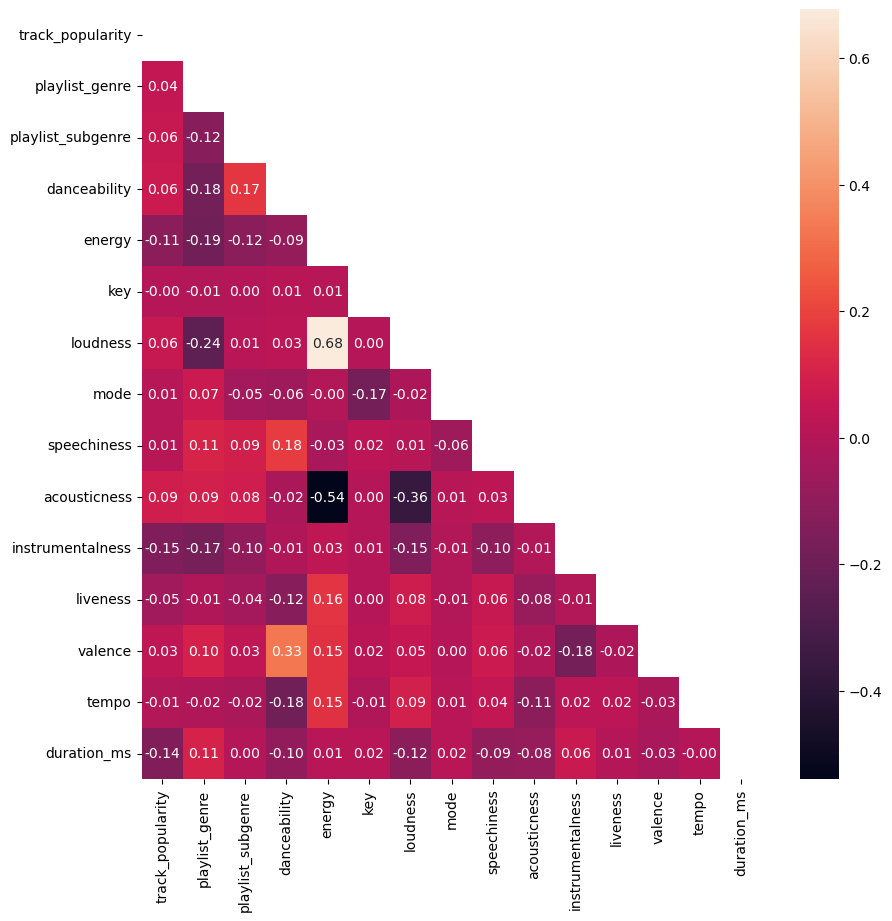

In [54]:
#correlation heatmap of numerial data
plt.figure(figsize=(10,10))
sns.heatmap(
    spotify_df[numerical_cols].corr(),
    annot=True,
    annot_kws={'size':10},
    fmt=".2f",
    mask=np.triu(np.ones_like(spotify_df[numerical_cols].corr(), dtype=bool))
    )

<Axes: >

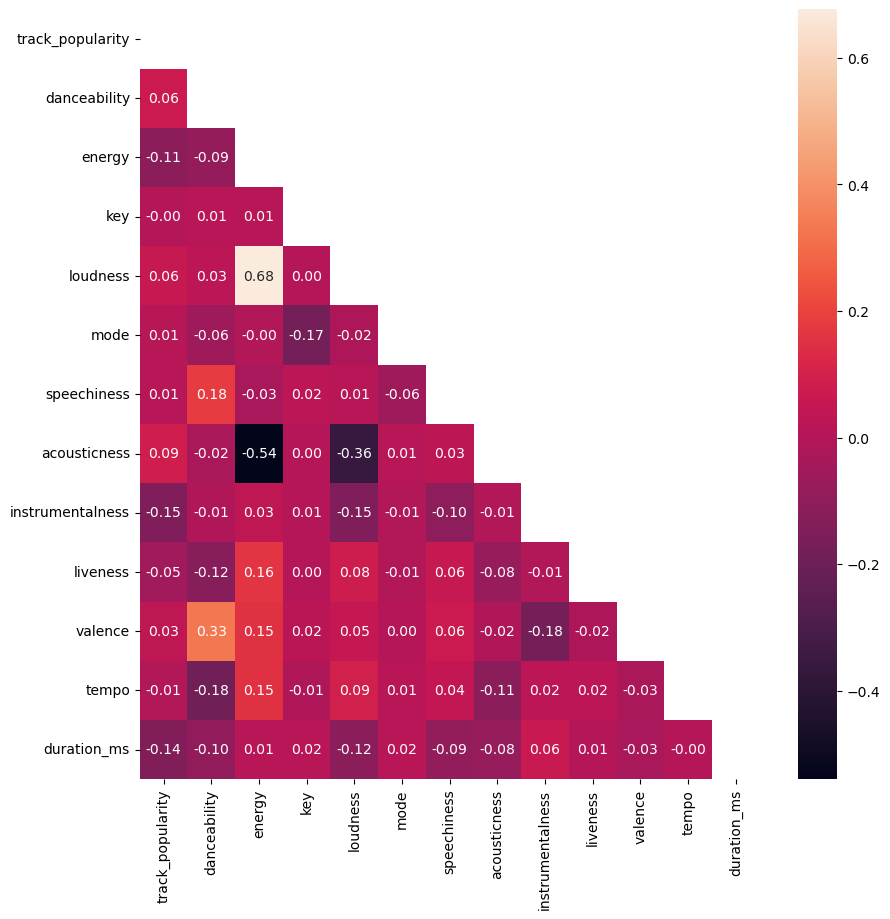

In [35]:
#correlation heatmap of numerial data
plt.figure(figsize=(10,10))
sns.heatmap(
    spotify_df[numerical_cols].corr(),
    annot=True,
    annot_kws={'size':10},
    fmt=".2f",
    mask=np.triu(np.ones_like(spotify_df[numerical_cols].corr(), dtype=bool))
    )

<Axes: >

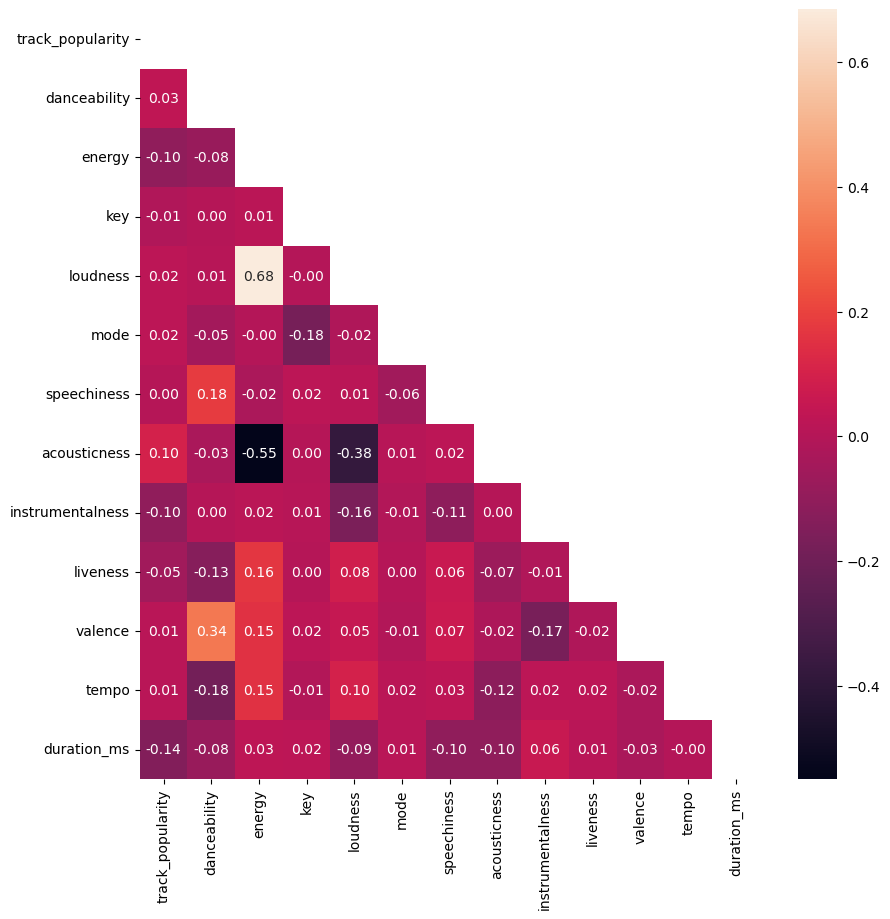

In [36]:
#correlation heatmap of numerial data
plt.figure(figsize=(10,10))
sns.heatmap(
    notdup_df[numerical_cols].corr(),
    annot=True,
    annot_kws={'size':10},
    fmt=".2f",
    mask=np.triu(np.ones_like(notdup_df[numerical_cols].corr(), dtype=bool))
)

## Train, Test and split before scaling final dataset

In [78]:
X = spotify_df[numerical_cols]
X = X.drop(columns=['playlist_genre', 'track_popularity', 'playlist_subgenre'])
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [79]:
y = spotify_df['playlist_genre']
y

0        2
1        2
2        2
3        2
4        2
        ..
32828    0
32829    0
32830    0
32831    0
32832    0
Name: playlist_genre, Length: 32833, dtype: int64

In [71]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(spotify_df.drop(columns=['playlist_genre']), spotify_df['playlist_genre'], test_size=0.2, stratify=spotify_df['playlist'], random_state=42)

KeyError: 'playlist'

In [80]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [81]:
print("Train target distribution:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Test target distribution:", dict(zip(*np.unique(y_test, return_counts=True))))

Train target distribution: {0: 4834, 1: 4124, 2: 4405, 3: 4345, 4: 4597, 5: 3961}
Test target distribution: {0: 1209, 1: 1031, 2: 1102, 3: 1086, 4: 1149, 5: 990}


## Scaling and Finishing up

In [82]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.718267,0.107983,-1.488402,0.570945,0.871500,0.078801,-0.495740,-0.375503,-0.380020,-1.347083,-0.776605,0.433182
1,1.819538,-0.057413,1.007090,0.310053,-1.147447,-0.292433,-0.420024,-0.377485,-0.891000,0.711471,-0.737550,-1.047114
2,0.725150,-0.652839,-0.102018,0.817435,0.871500,-0.751539,-0.653972,-0.377535,-0.502914,0.758647,-1.449531,1.407014
3,-0.162750,-0.151137,0.729813,-0.080112,0.871500,0.453985,-0.688429,-0.377535,-0.399424,1.607800,3.461241,-0.680026
4,-2.771385,1.519363,1.284366,1.044501,-1.147447,1.154986,-0.799382,1.729922,5.176082,-0.695207,1.419833,4.160189
...,...,...,...,...,...,...,...,...,...,...,...,...
26261,-1.491158,-1.022223,-0.933849,-0.610937,0.871500,-0.733768,-0.410050,-0.377535,1.288751,-0.150548,-0.870545,-0.083014
26262,0.050621,0.957016,1.561643,-1.996441,-1.147447,-0.633060,-0.799486,3.560552,-0.619340,0.861574,-0.124600,1.231339
26263,-0.376121,-2.791961,0.729813,0.256468,-1.147447,-0.726856,3.166721,-0.376762,-0.502914,-1.608691,-1.742498,-0.136365
26264,0.415417,-0.658352,-0.656572,-0.228475,0.871500,-0.654782,-0.677548,-0.377535,0.363812,0.634276,0.080410,-0.406366


In [84]:
X_columns = X.columns.tolist()
X_columns

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [85]:
# Saving processed data to csv
pd.DataFrame(X_train_scaled, columns=X_columns).to_csv('../data/processed/X_train_scaled.csv', index=False)
pd.DataFrame(X_test_scaled, columns=X_columns).to_csv('../data/processed/X_test_scaled.csv', index=False)
pd.DataFrame(y_train, columns=['playlist_genre']).to_csv('../data/processed/y_train.csv', index=False)
pd.DataFrame(y_test, columns=['playlist_genre']).to_csv('../data/processed/y_test.csv', index=False)

## Model Selection